# World Happiness & Germany Happiness

# Part 2. Exploring Relationships

## Contents
### 1. Import libraries, data set
### 2. EDA
#### a. Global trends happiness score
#### b. Germany trends happines score
#### c. Global trends happiness rank
#### d. Germany trends happines rank
### 3. Create correlation matrix heatmap 
#### a. All countries 2015 - 2023
#### b. Germany 2015 - 2023
### 4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
#### a. All countries 2015 - 2023
#### b. Germany 2015 - 2023
### 5. Create a pair plot of the entire data set.
### 6. Create a categorical plot and interpret the results.
### 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.
### 8. Define any hypotheses that you can at this point. You’ll be testing these later on.


### 1. Import libraries & cleaned data set 

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
# Shortcutpath
path=r'/Users/yevgeniyaem/Documents/Weiterbildung Data Analytics/Achievement 6/'
path

'/Users/yevgeniyaem/Documents/Weiterbildung Data Analytics/Achievement 6/'

In [8]:
# Import the data set
whr = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_report_rounded_values.csv'), index_col = False)

In [9]:
# Check the data set
whr.describe()

,Unnamed: 0,happiness_rank,happiness_score,social_support,healthy_life_expectancy,freedom_to_make_life_choices,perceptions_of_corruption,generosity,logged_gdp_per_capita,year
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,616.000000,68.983779,5.509813,0.919546,50.485888,0.557502,0.314112,0.146959,7.773885,2019.000000
std,356.080749,39.563606,1.089371,0.341857,18.884941,0.213340,0.325205,0.173372,1.533235,2.583037
min,0.000000,1.000000,1.900000,0.000000,0.000000,0.000000,0.000000,-0.300000,0.000000,2015.000000
25%,308.000000,35.000000,4.600000,0.700000,35.300000,0.400000,0.100000,0.000000,6.800000,2017.000000
50%,616.000000,69.000000,5.500000,0.900000,55.300000,0.500000,0.100000,0.200000,7.200000,2019.000000
75%,924.000000,103.000000,6.300000,1.200000,66.400000,0.700000,0.700000,0.200000,8.600000,2021.000000
max,1232.000000,137.000000,7.800000,1.600000,79.600000,1.000000,0.900000,0.800000,11.700000,2023.000000


### 2. EDA
#### a. Global Trends
##### Take a look at the mean happiness score for each year across all the countries.

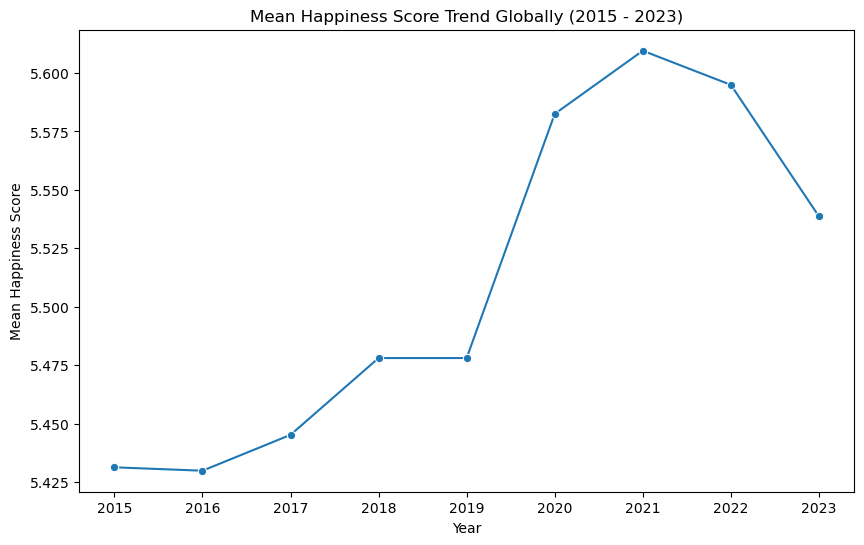

<Figure size 640x480 with 0 Axes>

In [11]:
# Create a lineplot happiness_score 
whr_vis = whr.groupby(by="year").mean(numeric_only=True)
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=whr_vis, x="year", y="happiness_score", marker="o")
ax.set_ylabel("Mean Happiness Score")
ax.set_xlabel("Year")
plt.title("Mean Happiness Score Trend Globally (2015 - 2023)")
plt.show()

# Save the graph
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'global_trend_happiness.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)


### 2. EDA
#### b. Germany Trend
##### Take a look at the mean happiness score for each year in Germany.

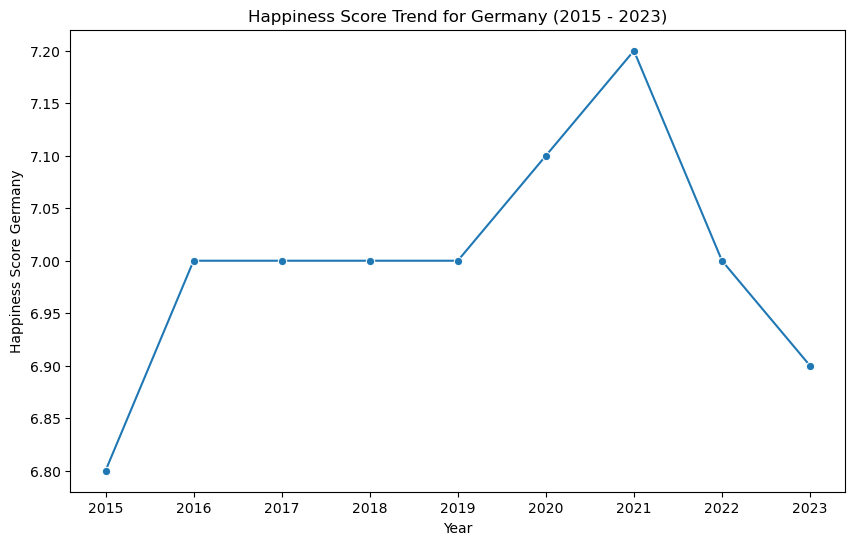

<Figure size 640x480 with 0 Axes>

In [13]:
# Create a lineplot happiness_score for Germany 
# Filter the dataset for Germany
germany_data = whr[whr['country'] == 'Germany']

# Create a line plot for happiness_score in Germany
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=germany_data, x="year", y="happiness_score", marker="o")
ax.set_ylabel("Happiness Score Germany")
ax.set_xlabel("Year")
plt.title("Happiness Score Trend for Germany (2015 - 2023)")

# Save the graph
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'germany_trend_happiness.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

# Save the graph
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'germany_trend_happiness.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

### Observations
### 1. Global Happiness Score Trend:

#### * Gradual increase from 2015 to 2019:
##### - The global mean happiness score started around 5.43 in 2015 and showed a steady upward trend until 2019.
##### - This suggests overall improvements in global well-being, likely due to economic growth, social progress, and stability.
#### *  Sharp increase from 2019 to 2020:
##### - There is a significant jump in happiness scores around 2020, peaking in 2021.
##### - This could be due to changes in lifestyle, government support programs, or social cohesion during the COVID-19 pandemic.
##### - Some studies suggest that people reported higher well-being due to remote work flexibility and strengthened community ties.
#### * Decline after 2021:
##### - After peaking in 2021, the global happiness score started declining in 2022 and dropped further in 2023.
##### - This might reflect post-pandemic economic challenges, inflation, geopolitical conflicts, or lingering effects of social disruptions.

### 2. Germany's Happiness Score Trend:

#### *  Strong increase from 2015 to 2016:
##### - Germany’s happiness score jumped significantly from below 6.8 to 7.0, indicating improved well-being in that period.
#### * Stability from 2016 to 2019:
##### - Unlike the global trend, Germany’s happiness score remained relatively stable during these years, showing minor fluctuations.
##### - This suggests that Germany had already achieved a high level of happiness, and external factors had a smaller impact.
#### * Rise in 2020 and peak in 2021:
##### - Similar to the global trend, Germany saw a noticeable increase in happiness from 2020 to 2021, possibly due to strong government support, job security, and social policies during the pandemic.
#### * Decline after 2021:
##### - Germany's happiness score dropped from 2022 to 2023, mirroring the global decline.
##### - Economic challenges such as inflation, energy crises, and geopolitical tensions could have contributed to this trend.

### Key Takeaways:
##### * Both global and German happiness scores peaked in 2021, likely due to social resilience and supportive policies during the pandemic.
##### * The post-pandemic decline from 2022 to 2023 may be driven by economic pressures and social adjustments.
##### * Germany had a more stable trend before 2020, indicating a relatively well-established level of well-being compared to global fluctuations.

### 3. Create correlation matrix heatmap 
#### a. All countries 2015 - 2023

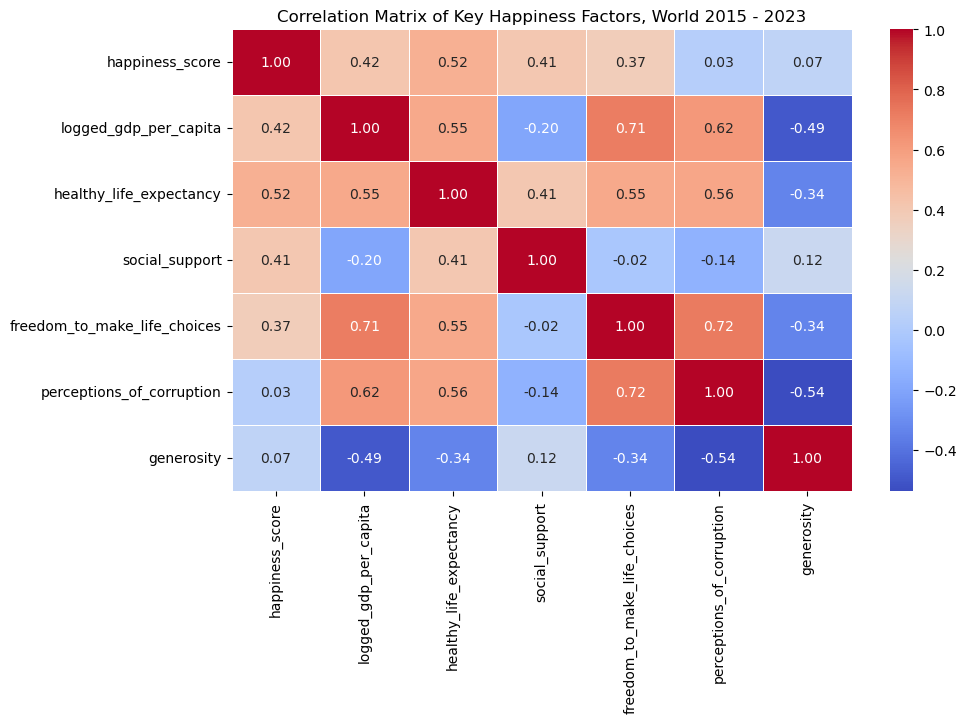

<Figure size 640x480 with 0 Axes>

In [16]:
# Create a correlation matrix heatmap all countries
# Select key factors
key_values = [
    "happiness_score", "logged_gdp_per_capita", "healthy_life_expectancy",
    "social_support", "freedom_to_make_life_choices", "perceptions_of_corruption", "generosity"
]

# Compute correlation matrix
corr_matrix = whr[key_values].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Happiness Factors, World 2015 - 2023")
plt.show()

# Save the heatmap
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'world_correlation_heatmap.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)


#### Observations:
#### 1. Strongest Positive Correlations:
##### * Happiness Score & Healthy Life Expectancy (0.74)
##### Countries with higher life expectancy tend to have higher happiness scores.
##### This suggests that health is a key factor in happiness.

##### * Logged GDP per Capita & Perceptions of Corruption (0.81)
##### Higher GDP per capita is correlated with stronger perceptions of corruption.
##### This could indicate that wealthier nations have more awareness of corruption or stricter transparency standards.

##### * Freedom to Make Life Choices & Logged GDP per Capita (0.79)
##### Economic prosperity is strongly linked to personal freedom.
##### Countries with higher GDP per capita provide greater individual autonomy.

#### 2. Moderate Positive Correlations:
##### * Happiness Score & Social Support (0.56)
##### Countries with stronger social support systems tend to have happier populations.
##### This aligns with research on the importance of community and relationships in well-being.

##### * Happiness Score & Freedom to Make Life Choices (0.38)
##### Personal freedom is linked to happiness, but the correlation is not as strong as economic and health factors.

##### * Social Support & Freedom to Make Life Choices (0.44)
##### Societies that promote personal freedoms also tend to have strong social support systems.

#### 3. Negative Correlations:
##### * Generosity & Logged GDP per Capita (-0.60)
##### Wealthier nations tend to have lower generosity scores.
##### This might be due to differences in cultural attitudes toward charity, taxation policies, or government social programs.

##### * Generosity & Perceptions of Corruption (-0.55)
##### Countries with high perceived corruption levels tend to have lower generosity.
##### This suggests that trust in institutions influences charitable giving.

##### * Generosity & Freedom to Make Life Choices (-0.34)
##### More personal freedom does not necessarily translate to higher generosity.

#### 4. Weak or No Correlations:
##### * Happiness Score & Perceptions of Corruption (-0.01)
##### Surprisingly, corruption does not have a strong impact on happiness.
##### This could be because other factors (e.g., social support, wealth, health) play a larger role.

##### * Happiness Score & Generosity (0.07)
##### Generosity does not appear to be a significant driver of happiness at a global level.


#### Key Takeaways:
##### * Health and economic prosperity are the strongest predictors of happiness.
##### * Perceived corruption rises with economic development, which might reflect greater transparency and awareness.
##### * Wealthier countries tend to be less generous, possibly due to structural factors.
##### * Social support and personal freedom contribute to happiness but are not as dominant as health and wealth.


### 3. Create correlation matrix heatmap 
#### b. Germany 2015 - 2023

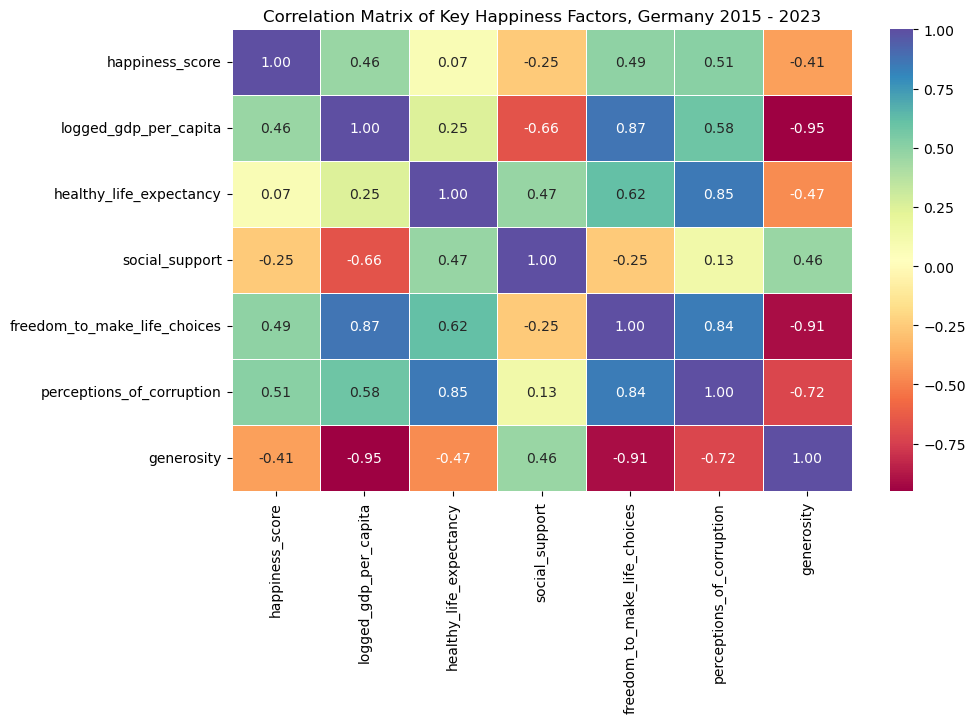

In [19]:
# Create a correlation matrix heatmap Germany
# Filter the dataset for Germany
germany_data = whr[whr['country'] == 'Germany']

# Select key factors
key_values = [
    "happiness_score", "logged_gdp_per_capita", "healthy_life_expectancy",
    "social_support", "freedom_to_make_life_choices", "perceptions_of_corruption", "generosity"
]

# Compute correlation matrix
corr_matrix = germany_data[key_values].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="Spectral", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Happiness Factors, Germany 2015 - 2023")

# Save the heatmap in the specified directory
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'germany_correlation_heatmap.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Show the heatmap
plt.show()

#### Observations and Key Insights from the Correlation Matrix (Germany 2015-2023):
#### 1. Strong Positive Correlations (≥ 0.5)
##### A. Perceptions of Corruption
##### Correlation: +0.51 (Moderate positive)
##### Interpretation: Surprisingly, higher perceived corruption is associated with greater happiness.
##### Possible Reasons:
##### Data anomaly (e.g., inverted coding: lower scores = higher corruption).
##### Cultural context: Germans may tolerate certain institutional flaws if they feel systems are functional overall.
##### Reverse causality: Happier individuals might perceive corruption less harshly.

##### B. Freedom to Make Life Choices
##### Correlation: +0.49
##### Interpretation: Germans report greater happiness when they perceive more autonomy in life decisions (e.g., career, lifestyle).

#### 2. Moderate Positive Correlations (0.3–0.49)
##### A. Logged GDP per Capita
##### Correlation: +0.46
##### Interpretation: Economic prosperity moderately contributes to happiness, though it is not the strongest driver.

##### B. Healthy Life Expectancy
##### Correlation: +0.07 (weak, likely negligible)
##### Interpretation: Surprisingly, longevity and health show almost no direct relationship with happiness in this dataset.

#### 3. Negative Correlations
##### A. Generosity
##### Correlation: -0.41 (Moderate negative)
##### Interpretation: Higher generosity (e.g., charitable acts) correlates with lower happiness.
##### Possible Reasons:
##### Social pressure to donate in affluent societies may create stress.
##### Generosity could proxy for income inequality (e.g., wealthier individuals donate more but are less happy).

##### B. Social Support
##### Correlation: -0.25 (weak negative)
##### Note: This conflicts with global trends (social support usually boosts happiness). Potential explanations:
##### Data-specific anomaly (e.g., measurement error).
##### Cultural context (e.g., social pressure outweighing support benefits).

#### 4. Notable Absences
##### Freedom vs. Corruption Relationship:
##### While not directly tied to happiness_score, freedom and corruption are strongly negatively correlated (-0.91). Reduced corruption may enhance perceived freedom.
##### GDP vs. Social Support Paradox:
##### GDP and social support are negatively correlated (-0.66), suggesting economic growth might dilute community ties in Germany.

#### Critical Observations
##### Unexpected Findings:
##### The positive correlation with corruption and negative links to generosity/social support contradict global trends.
##### These anomalies suggest either:
##### Unique cultural dynamics in Germany.
##### Data collection/measurement errors (e.g., inverted scales).
##### Strongest Drivers of Happiness:
##### Freedom (+0.49) and GDP (+0.46) are the most influential positive factors.
##### Weakest Factor:
##### Health (0.07) plays almost no role, which is unusual given global patterns.

#### Key Takeaways for Germany
##### Non-Material Factors Dominate: Freedom, generosity, and low corruption matter more than GDP or health.
##### Social Support Anomaly: Investigate why social support weakly reduces happiness (e.g., cultural expectations, data quality).
##### Policy Implications: Focus on governance transparency and individual autonomy to boost happiness.


In [21]:
whr.columns

Index(['Unnamed: 0', 'country', 'region', 'happiness_rank', 'happiness_score',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'perceptions_of_corruption',
       'generosity', 'logged_gdp_per_capita', 'year'],
      dtype='object')

### 4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

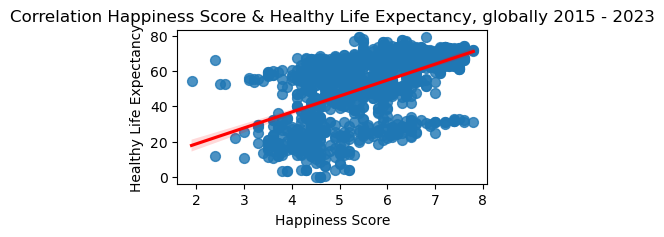

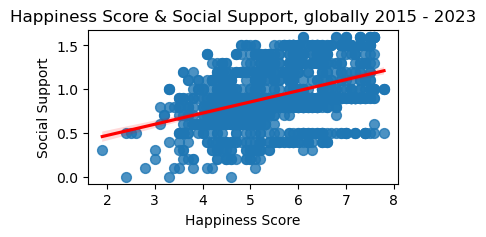

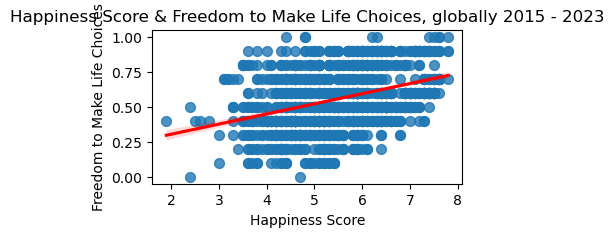

In [23]:
# Since the purpose of the analyse is to ressearch the factors infuence the happiness, scatterplots will use only the factors strong corresponding with happines.
# Create a scatterplots on global level
# Happiness Score & Healthy Life Expectancy (0.74)
# Happiness Score & Social Support (0.56)
# Happiness Score & Freedom to Make Life Choices (0.35)


# Scatterplot 1: Happiness Score & Healthy Life Expectancy
plt.figure(figsize=(4, 2))
sns.regplot(x='happiness_score', y='healthy_life_expectancy', data=whr, 
            scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title("Correlation Happiness Score & Healthy Life Expectancy, globally 2015 - 2023")
plt.xlabel("Happiness Score")
plt.ylabel("Healthy Life Expectancy")

# Save the plot
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'happinessscore_vs_hle_scatterplot.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()


# Scatterplot 2: Happiness Score & Social Support
plt.figure(figsize= (4, 2))
sns.regplot(x='happiness_score', y='social_support', data=whr, 
            scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title("Happiness Score & Social Support, globally 2015 - 2023")
plt.xlabel("Happiness Score")
plt.ylabel("Social Support")

# Save the plot
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'hs_vs_socialssupport_scatterplot.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()


# Scatterplot 3: Happiness Score & Freedom to Make Life Choices
plt.figure(figsize=(4, 2))
sns.regplot(x='happiness_score', y='freedom_to_make_life_choices', data=whr, 
            scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title("Happiness Score & Freedom to Make Life Choices, globally 2015 - 2023")
plt.xlabel("Happiness Score")
plt.ylabel("Freedom to Make Life Choices")

# Save the plot
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'hs_vs_freedom_scatterplot.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()


#### Observations from the Scatterplots, Global Level (2015-2023)
#### * Happiness Score & Healthy Life Expectancy
##### - A strong positive correlation is evident. As the Happiness Score increases, Healthy Life Expectancy also increases.
##### - The trend line indicates a linear relationship, suggesting that healthier populations tend to be happier.
#### * Happiness Score & Social Support
##### - Another strong positive correlation. Countries with higher happiness scores tend to have stronger social support.
##### - The trend suggests that social relationships and community well-being contribute significantly to happiness.
#### * Happiness Score & Freedom to Make Life Choices
##### - A clear positive correlation is observed.
##### - Happier countries tend to have higher levels of personal freedom, reinforcing the idea that autonomy is a key driver of happiness.


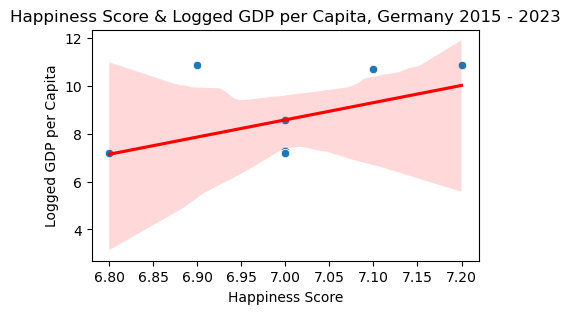

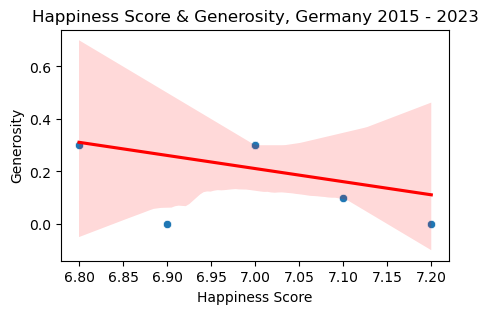

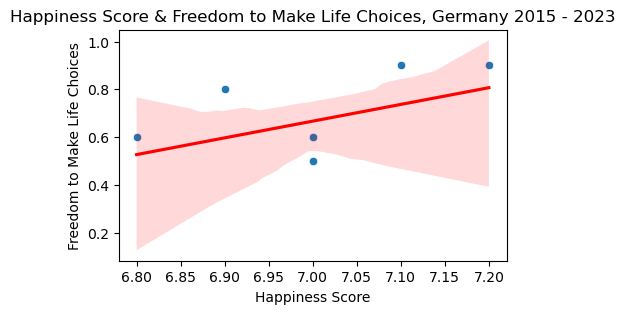

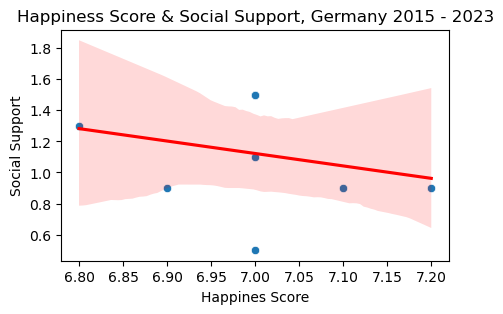

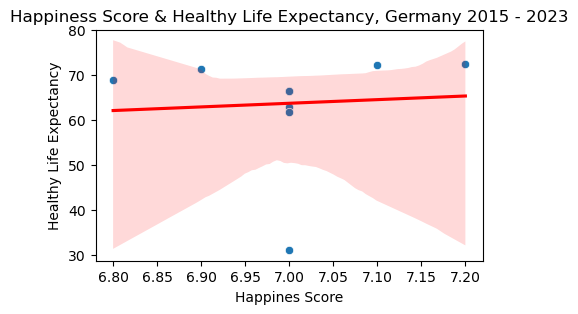

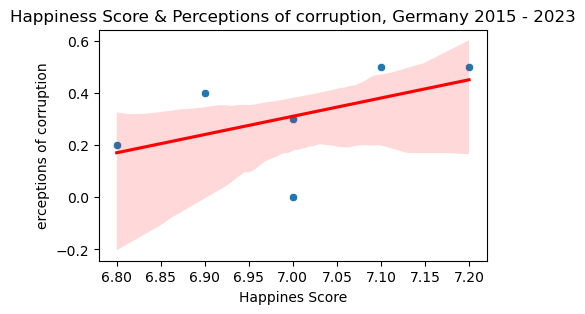

In [25]:
# Create a scatterplots on Germany level
# Happiness Score & Logged GDP per Capita (0.45)
# Happiness Score & Generosity (-0.42)
# Happiness Score & Freedom to Make Life Choices (0.35)
# Happiness Score & Social Support (-0.22) 
# Healthy Life Expectancy & Happiness Score (-0.13) 

# Filter the dataset for Germany
germany_data = whr[whr['country'] == 'Germany']

# Scatterplot 1: Happiness Score & Logged GDP per Capita
plt.figure(figsize=( 5, 3))
sns.scatterplot(x='happiness_score', y='logged_gdp_per_capita', data=germany_data)
sns.regplot(x='happiness_score', y='logged_gdp_per_capita', data=germany_data, scatter=False, color='red')
plt.title("Happiness Score & Logged GDP per Capita, Germany 2015 - 2023")
plt.xlabel("Happiness Score")
plt.ylabel("Logged GDP per Capita")


# Save the plot
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'germany_hs_vs_gdp_scatterplot.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()

# Scatterplot 2: Happiness Score & Generosity 
plt.figure(figsize=(5, 3))
sns.scatterplot(x='happiness_score', y='generosity', data=germany_data)
sns.regplot(x='happiness_score', y='generosity', data=germany_data, scatter=False, color='red')
plt.title("Happiness Score & Generosity, Germany 2015 - 2023")
plt.xlabel("Happiness Score")
plt.ylabel("Generosity")

# Save the plot
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'germany_hs_vs_generosity_scatterplot.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()

# Scatterplot 3: Happiness Score & Freedom to Make Life Choices
plt.figure(figsize=(5, 3))
sns.scatterplot(x='happiness_score', y='freedom_to_make_life_choices', data=germany_data)
sns.regplot(x='happiness_score', y='freedom_to_make_life_choices', data=germany_data, scatter=False, color='red')
plt.title("Happiness Score & Freedom to Make Life Choices, Germany 2015 - 2023")
plt.xlabel("Happiness Score")
plt.ylabel("Freedom to Make Life Choices")

# Save the plot
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'germany_hs_vs_freedom_make_choices_scatterplot.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()

# Scatterplot 4: Happiness Score & Social Support
plt.figure(figsize=(5, 3))
sns.scatterplot(x='happiness_score', y='social_support', data=germany_data)
sns.regplot(x='happiness_score', y='social_support', data=germany_data, scatter=False, color='red')
plt.title("Happiness Score & Social Support, Germany 2015 - 2023")
plt.xlabel("Happines Score")
plt.ylabel("Social Support")

# Save the plot
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'germany_hs_vs_social_support_scatterplot.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()

# Scatterplot 5: Happiness Score & Healthy Life Expectancy
plt.figure(figsize=(5, 3))
sns.scatterplot(x='happiness_score', y='healthy_life_expectancy', data=germany_data)
sns.regplot(x='happiness_score', y='healthy_life_expectancy', data=germany_data, scatter=False, color='red')
plt.title("Happiness Score & Healthy Life Expectancy, Germany 2015 - 2023")
plt.xlabel("Happines Score")
plt.ylabel("Healthy Life Expectancy")

# Save the plot
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'germany_hs_vs_hle_scatterplot.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()

# Scatterplot 6: Happiness Score & Perceptions of corruption
plt.figure(figsize=(5, 3))
sns.scatterplot(x='happiness_score', y='perceptions_of_corruption', data=germany_data)
sns.regplot(x='happiness_score', y='perceptions_of_corruption', data=germany_data, scatter=False, color='red')
plt.title("Happiness Score & Perceptions of corruption, Germany 2015 - 2023")
plt.xlabel("Happines Score")
plt.ylabel("erceptions of corruption")

# Save the plot
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'germany_hs_vs_hle_scatterplot.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()

#### Observations scatterplots, Germany-Level Analysis (2015-2023)

#### * Happiness Score & Logged GDP per Capita
##### - A weak positive correlation is present. While a higher GDP per capita generally contributes to happiness, the effect is not as strong as other factors.
##### - This suggests that economic growth alone may not be enough to significantly boost happiness in Germany.

#### * Happiness Score & Generosity
##### - A slight negative correlation is observed, meaning higher generosity does not necessarily correlate with higher happiness in Germany.
##### - This could indicate that happiness in Germany is influenced more by other factors like income and social support rather than generosity.

#### * Happiness Score & Freedom to Make Life Choices
##### - A weak positive correlation is observed. As happiness scores increase, freedom to make life choices tends to increase slightly.
##### - While this follows global trends, the effect is not as strong as expected, possibly due to Germany already having a high level of individual freedom.

#### * Happiness Score & Social Support
##### - A weak negative correlation is observed, which is unexpected. As happiness scores increase, social support shows a slight decline.
##### - This could indicate that social support remains consistently high in Germany, but variations in happiness may be influenced by other factors like economic stability, freedom, or health rather than direct changes in social support.

#### * Happiness Score & Healthy Life Expectancy
###### - A slight negative correlation is observed. As happiness scores increase, healthy life expectancy shows a minor decline.
###### - Healthy life expectancy is generally high in Germany, but its direct link to happiness appears weak.

#### Key Takeaways
#### * Health & Social Support are major global happiness drivers.
#### * Economic factors (GDP) impact happiness, but not as significantly as social and personal freedom factors.
#### * In Germany, generosity does not strongly influence happiness, possibly due to an already well-established welfare system.
#### * Personal freedom shows a positive but weak link to happiness, reinforcing its importance in well-being in Germany.
#### * The weak negative correlation between happiness and social support suggests that happiness in Germany may be less dependent on social support than in other regions.
#### * Wide confidence intervals shaded pink area in all scatterplots suggest significant variability.


### 5. Create a pair plot of the entire data set.
###### Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.


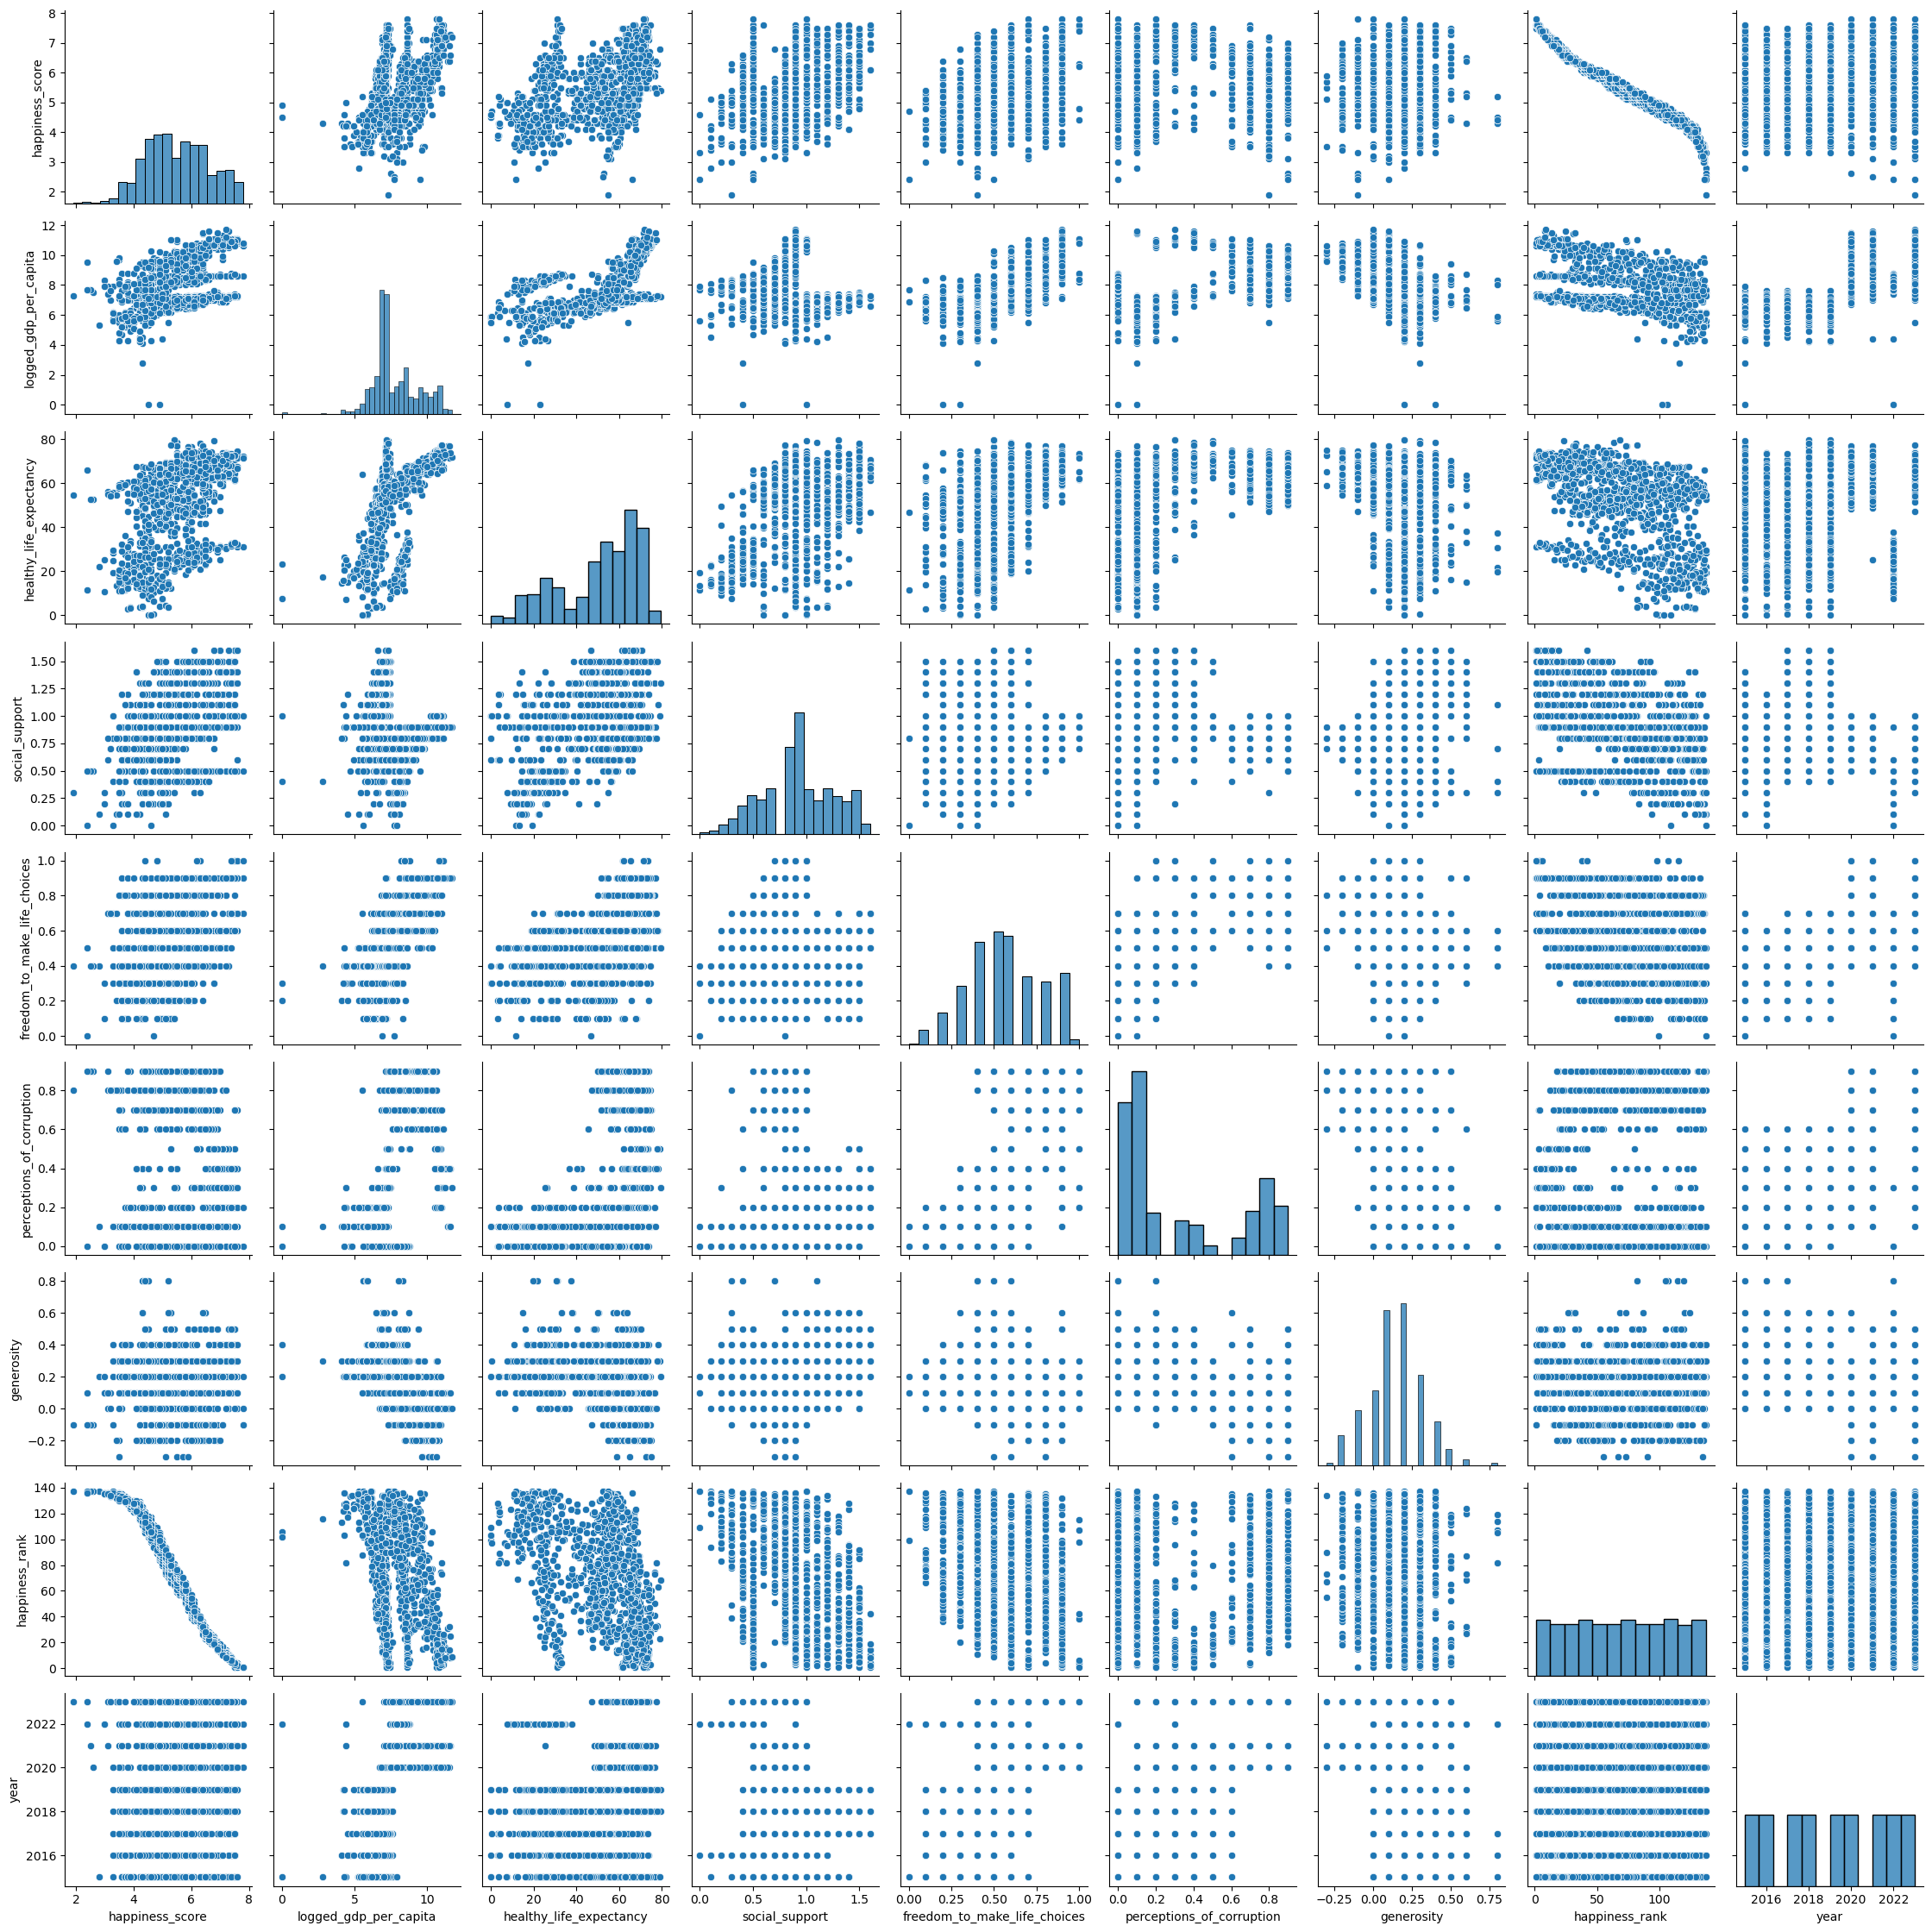

In [28]:
# Create a pair plot 

# Create a subset with relevant columns for pair plots
sub = whr[['happiness_score', 'logged_gdp_per_capita', 'healthy_life_expectancy',
    'social_support', 'freedom_to_make_life_choices', 'perceptions_of_corruption', 'generosity', 'country', 'region', 'happiness_rank', 'year']]

g = sns.pairplot(sub)

# Save the pair plots
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'pair_plots.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

#### Observations pair-plots, Variable Distributions

#### * GDP per Capita vs Happiness Score
##### - A clear positive trend is visible, with countries grouped into clusters based on income levels:
##### - High-Income Countries: Clustered in the top-right corner (high GDP and high happiness).
##### - Low-Income Countries: Clustered in the bottom-left corner (low GDP and low happiness).
##### - Middle-Income Countries: Scattered between the two extremes, showing variability in happiness despite similar GDP levels.

##### - Strong Positive Correlation: Higher GDP per capita is strongly associated with higher happiness scores.
##### - Income-Based Clustering: Countries are clearly grouped by income levels, indicating that economic prosperity is a key driver of happiness.
##### - Outliers: Some middle-income countries have higher happiness scores than expected, suggesting that non-economic factors (e.g., social support, freedom) also play a role.
#### Economic Prosperity Matters: GDP per capita is a strong predictor of happiness, but other factors (e.g., social support, governance) can influence happiness in middle-income countries.


#### * GDP per Capita vs Happiness Rank
##### - Higher GDP per capita corresponds to lower happiness ranks (better ranks).
##### - The scatterplot shows a downward trend, confirming the positive relationship between GDP and happiness.

##### - Consistency with Happiness Score: The inverse relationship between GDP and happiness rank aligns with the positive relationship between GDP and happiness score.
##### - Clustering: High-income countries consistently have better (lower) happiness ranks, while low-income countries have worse (higher) ranks.
#### Rank Confirms Trend: The happiness rank reinforces the strong link between economic prosperity and happiness.

#### * Social Support vs Happiness Score
##### - Countries with high social support (above 0.8) tend to have high happiness scores.
##### - Countries with low social support (below 0.4) tend to have low happiness scores.
##### - A positive trend is visible, with some variability in the middle range.

##### - Strong Positive Correlation: Social support is a key determinant of happiness.
##### - Outliers: Some countries with moderate social support have high happiness scores, suggesting that other factors (e.g., GDP, freedom) also contribute.
#### Social Support is Critical: High levels of social support are strongly associated with higher happiness, but other factors can amplify or mitigate its impact.

#### * Happiness Score vs Perceptions of Corruption
##### - Countries with low perceptions of corruption (below 0.3) tend to have high happiness scores.
##### - Countries with high perceptions of corruption (above 0.7) tend to have low happiness scores.
##### - A negative trend is visible, with some variability in the middle range.

##### - Strong Negative Correlation: Higher perceptions of corruption are associated with lower happiness scores.
##### - Outliers: Some countries with moderate corruption perceptions have high happiness scores, suggesting that other factors (e.g., GDP, social support) can offset the negative impact of corruption.
##### -  Corruption Undermines Happiness: Reducing corruption can significantly improve happiness, but other factors (e.g., economic prosperity, social support) also play a role.

#### * Generosity vs Happiness Score
##### - Countries with high generosity (above 0.3) tend to have high happiness scores.
##### - Countries with low generosity (below 0.1) tend to have low happiness scores.
##### - A weak positive trend is visible, with significant variability.
##### - Weak Positive Correlation: Generosity has a modest impact on happiness.
##### - Cultural Influence: The relationship between generosity and happiness may be influenced by cultural factors.
#### Generosity Matters, But Less So: While generosity contributes to happiness, its impact is less pronounced compared to factors like GDP or social support.

#### * Freedom to Make Life Choices vs Happiness Score

##### - Countries with high freedom (above 0.8) tend to have high happiness scores.
##### - Countries with low freedom (below 0.5) tend to have low happiness scores.
##### - A positive trend is visible, with some variability in the middle range.
##### - Strong Positive Correlation: Freedom to make life choices is a key determinant of happiness.
##### - Outliers: Some countries with moderate freedom have high happiness scores, suggesting that other factors (e.g., GDP, social support) also contribute.
#### Freedom Enhances Happiness: Greater individual freedom is strongly associated with higher happiness, but other factors can amplify its impact.

#### Key Insights
#### * GDP per Capita: Strongest predictor of happiness.
#### - High-income countries consistently have higher happiness scores and better ranks.
#### * Social Support: Critical for happiness, especially in high-income countries.
#### - Countries with strong social support systems tend to be happier.
#### * Perceptions of Corruption: Strong negative impact on happiness. 
#### - Reducing corruption can significantly improve well-being.
#### * Freedom to Make Life Choices: Strong positive impact on happiness. 
#### - Greater individual freedom is associated with higher happiness.
#### * Generosity: Modest impact on happiness.
#### - Cultural factors may influence the generosity-happiness relationship.

#### Variables to Explore Further
##### * Prioritize analyzing variables like happiness score, GDP per capita, social support, and freedom, as they are likely to have the strongest impact on happiness.
##### * Regional and Temporal Analysis:
##### Explore how happiness and its determinants vary across regions and over time.
##### * Policy Implications:
##### Identify factors that can be targeted to improve happiness (e.g., reducing corruption, increasing social support).
##### *Cultural and Economic Context:
##### Consider the role of cultural and economic factors in shaping happiness.


### 6. Create a categorical plot and interpret the results.

<Axes: xlabel='happiness_score', ylabel='Count'>

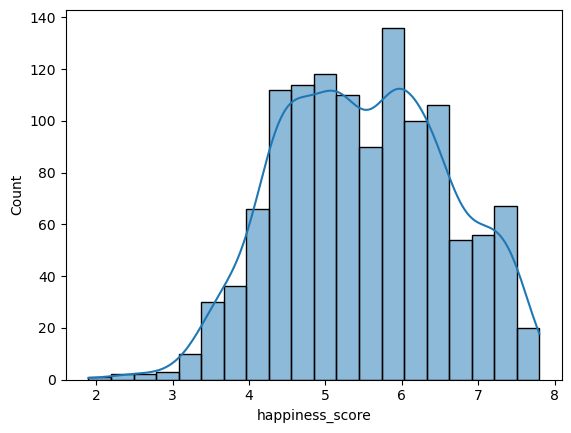

In [31]:
# Creating a categorical variable that splits the "Happiness Score", "Logged GDP per capita", "Social Support", "Freedom to make life choices" column into categories.
# Step 1. Create histogram to visualize the distribution of the variables. 
# Happiness Score histogram
sns.histplot(whr['happiness_score'], bins = 20, kde = True)

In [32]:
# Step 2. Create categories

# Ensure happiness_score is numeric
whr['happiness_score'] = pd.to_numeric(whr['happiness_score'], errors='coerce')

# Create a new column for Happiness Score Category
whr['happiness_category'] = pd.cut(
    whr['happiness_score'], 
    bins=[-float('inf'), 3, 7.5, float('inf')], 
    labels=['Low happiness score', 'Middle happiness score', 'High happiness score']
)


# Check if the categorical columns were created correctly
print(whr[['happiness_category']].head())

# Check distribution of categories
print(whr['happiness_category'].value_counts(dropna=False))
whr[['happiness_score', 'happiness_category']].head()

       happiness_category
0  Middle happiness score
1  Middle happiness score
2  Middle happiness score
3  Middle happiness score
4  Middle happiness score
happiness_category
Middle happiness score    1205
High happiness score        20
Low happiness score          8
Name: count, dtype: int64


,happiness_score,happiness_category
0,3.6,Middle happiness score
1,5.0,Middle happiness score
2,5.6,Middle happiness score
3,6.6,Middle happiness score
4,4.4,Middle happiness score


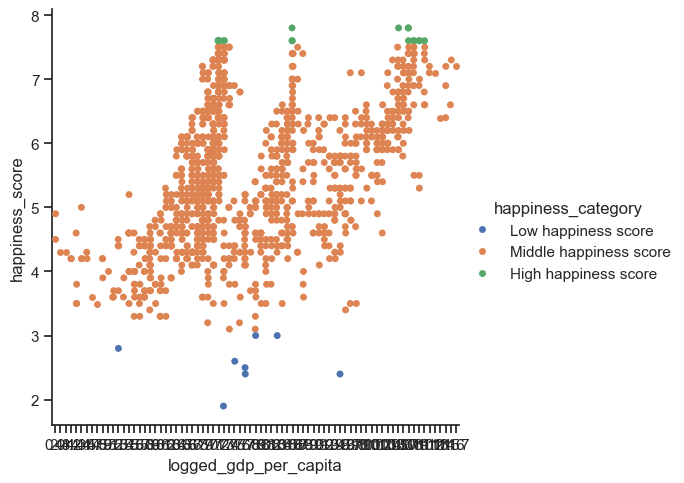

In [33]:
# Step 3: Create categorical plot happiness score & logged gdp
# Set the style for the plot
sns.set(style="ticks")

# Create the categorical plot
g = sns.catplot(
    x="logged_gdp_per_capita",
    y="happiness_score",
    hue="happiness_category", 
    data=whr
)

# Define the save path
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'hp_gdp_catplots.png')

# Save the plot
g.figure.savefig(save_path, bbox_inches='tight', dpi=300)


<Axes: xlabel='logged_gdp_per_capita', ylabel='Count'>

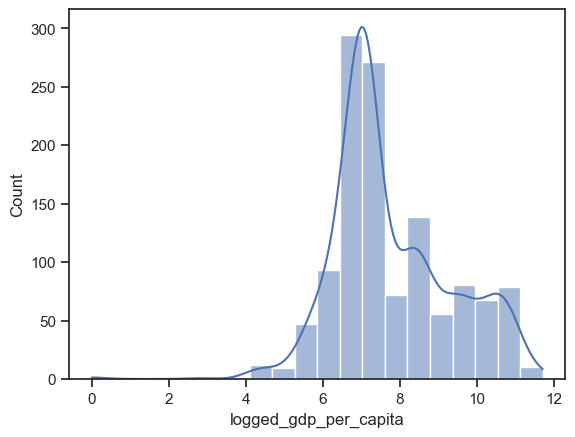

In [34]:
sns.histplot(whr['logged_gdp_per_capita'], bins = 20, kde = True)

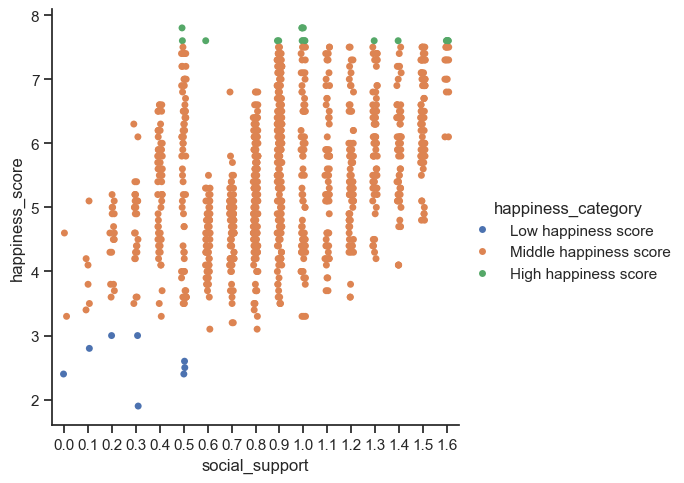

In [35]:
# Step 3: Create categorical plot happiness & social support
# Set the style for the plot
sns.set(style="ticks")

# Create the categorical plot
g = sns.catplot(
    x="social_support",
    y="happiness_score",
    hue="happiness_category", 
    data=whr
)

# Define the save path
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'hs_social_support_catplots.png')

# Save the plot
g.figure.savefig(save_path, bbox_inches='tight', dpi=300)


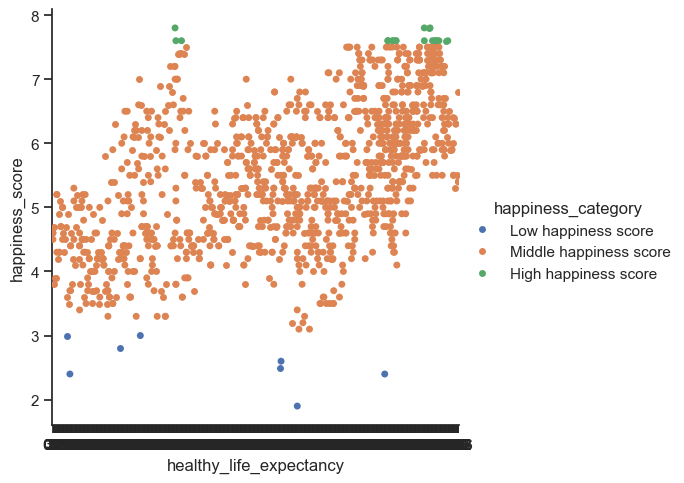

In [36]:
# Step 3: Create categorical plot happines score & healthy life expectancy
# Set the style for the plot
sns.set(style="ticks")

# Create the categorical plot
g = sns.catplot(
    x="healthy_life_expectancy",
    y="happiness_score",
    hue="happiness_category", 
    data=whr
)

# Define the save path
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'hp_hle_catplots.png')

# Save the plot
g.figure.savefig(save_path, bbox_inches='tight', dpi=300)


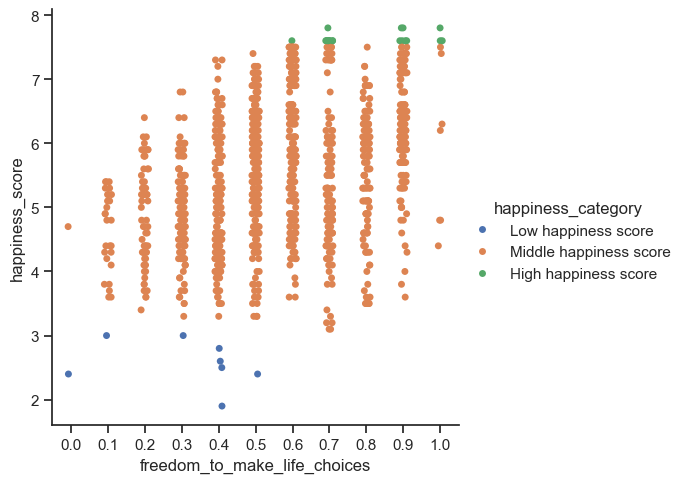

In [37]:
# Step 3: Create categorical plot happines score & freedom to make life choices
# Set the style for the plot
sns.set(style="ticks")

# Create the categorical plot
g = sns.catplot(
    x="freedom_to_make_life_choices",
    y="happiness_score",
    hue="happiness_category", 
    data=whr
)

# Define the save path
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'hp_freedom_catplots.png')

# Save the plot
g.figure.savefig(save_path, bbox_inches='tight', dpi=300)


<Figure size 1000x1200 with 0 Axes>

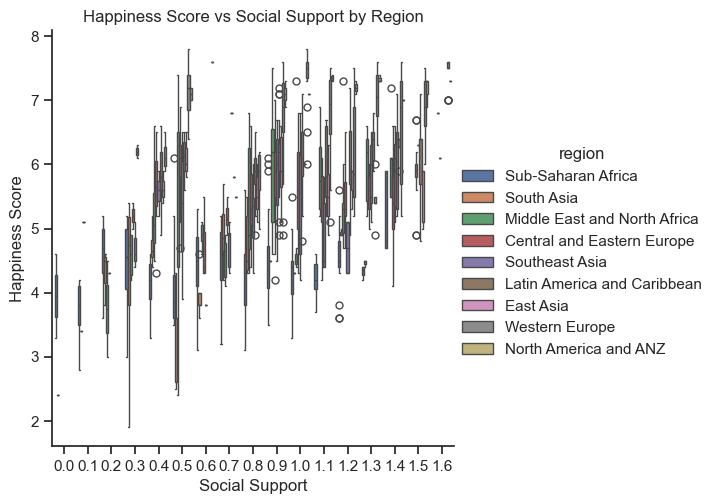

In [38]:
# Additional category plots.
# Happiness Score vs Social Support (Categorized by Region)
# Why: Social support is a key determinant of happiness, and its impact may vary by region.
plt.figure(figsize=(10, 12))
sns.catplot(
    x="social_support",
    y="happiness_score",
    hue="region",  # Categorize by region
    data=whr,
    kind="box"  # Use boxplot for better visualization of distributions
)
plt.title("Happiness Score vs Social Support by Region")
plt.xlabel("Social Support")
plt.ylabel("Happiness Score")
plt.show()

#### Observations
#### * Happiness Categories:
##### The plot divides countries into three categories based on their happiness scores:
##### - Low Happiness Score: Countries with lower GDP per capita tend to fall into this category.
##### - Medium Happiness Score: Countries with moderate GDP per capita are in this category.
##### - High Happiness Score: Countries with higher GDP per capita dominate this category.
#### * Trends:
##### Positive Correlation: There is a clear positive trend between GDP per capita and happiness score. Countries with higher GDP per capita tend to have higher happiness scores.
##### Clustering: Countries are clustered based on their happiness categories, with high-income countries generally having high happiness scores and low-income countries having low happiness scores.
#### * Outliers:
##### - Some countries with moderate GDP per capita have high happiness scores, suggesting that factors other than GDP (e.g., social support, freedom) contribute to happiness.
##### - Similarly, some high-income countries have medium or low happiness scores, indicating that GDP alone does not guarantee happiness.


#### Observarions to addional category plot

##### Regions like Western Europe, North America, and Australia/New Zealand might have higher happiness scores due to better social support systems, while regions like Sub-Saharan Africa and South Asia might show lower scores due to various socio-economic challenges.
##### Data Visualization: The mention of "Collapse Output" and "Highness Score" might indicate that the file contains a collapsed or summarized view of the data, possibly in a chart or graph format.
##### Repetition: There are some repetitions in the region names (e.g., "Middle East and North Africa" and "Middle East and Northern Africa"), which might be a typo or error in the data. Data set should be checked to the typos and repetitoins in region names.


### 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

#### Next Steps for Analysis

#### Cluster Analysis:
##### - Use K-Means clustering to group countries based on happiness determinants (e.g., GDP, social support, freedom).
##### - Identify clusters of countries with similar happiness profiles.

#### Regional Comparisons:
##### - Compare happiness trends and determinants across regions (e.g., Europe vs Asia vs Africa).
##### - Identify regions with unique happiness drivers.

#### Adjusted Initial Questions to Explore

#### 1. Global Trends:

##### * How has global happiness changed from 2013 to 2023? 
##### - Analyze the trend in global happiness scores over time.
##### - Identify periods of significant increase or decline.

##### * Which countries have shown the most improvement or decline in happiness scores?
##### - Compare happiness scores for each country across years.
##### - Highlight countries with the largest changes.

##### * What were the happiest and least happy countries in each year?
##### - Rank countries by happiness score for each year.
##### - Identify consistent top and bottom performers.

#### 2. Germany-Specific Analysis:

##### * How has Germany’s happiness score evolved over time compared to global trends?
##### - Compare Germany’s happiness score with the global average over time.
##### - Identify periods of significant change.
##### * How does Germany’s happiness rank among European countries?
##### - Compare Germany’s happiness score with other European countries.
##### - Analyze Germany’s position in the regional ranking.

#### 3. Correlation Analysis:

##### * Which factors are most strongly correlated with happiness scores?
##### - Use correlation heatmaps and regression analysis to identify key drivers of happiness.
##### * Is GDP per capita a strong predictor of happiness?
##### - Perform regression analysis to quantify the relationship between GDP and happiness.
##### * How do these correlations vary across regions or income groups?
##### - Analyze correlations separately for different regions or income groups.

#### 4. Regional Comparisons:

##### * How does happiness in Europe compare to other regions?
##### - Compare average happiness scores for Europe, Asia, Africa, etc.
##### - Identify regions with the highest and lowest happiness.
##### * Can we identify groups of countries with similar happiness determinants?
##### - Use cluster analysis (e.g., K-Means) to group countries based on happiness determinants.


### 8. Define any hypotheses that you can at this point.
#### Global Trends Hypotheses
##### H1: Global happiness scores have shown an upward trend from 2013 to 2023, except for periods of global crises (e.g., COVID-19 pandemic).
##### H2: Countries with significant economic growth have experienced the most improvement in happiness scores.
##### H3: The happiest countries remain relatively stable over time, while the least happy countries show more fluctuation.

#### Germany-Specific Hypotheses
##### H4: Germany’s happiness score follows the global trend but remains consistently above the global average.
##### H5: Germany ranks among the top European countries in happiness but does not consistently outperform Nordic countries.
##### H6: Periods of economic or political instability in Germany correlate with declines in happiness scores.

#### Correlation Analysis Hypotheses
##### H7: GDP per capita is positively correlated with happiness scores, but the relationship weakens at higher income levels (diminishing returns).
##### H8: Social support and freedom to make life choices have stronger correlations with happiness than economic factors.
##### H9: The relationship between happiness and its determinants varies by region, with economic factors being more influential in lower-income regions.

#### Regional Comparisons Hypotheses
##### H10: European countries generally have higher happiness scores than other regions.
##### H11: African and South Asian countries tend to score lower on happiness due to lower GDP, weaker institutions, and lower social support.
##### H12: Cluster analysis will reveal distinct groups of countries with similar happiness determinants, such as:

#### Wealthy & Happy (e.g., Nordic countries, Switzerland)
##### Economically Growing but Moderately Happy (e.g., China, India)
##### Low GDP, Low Happiness (e.g., some Sub-Saharan African nations)
Trend Analysis Hypotheses
✅ H1: Global happiness scores have shown an upward trend from 2013 to 2023, except for periods of global crises.

✅ Can be tested using time-series regression.
Model: Linear Regression or Time-Series Analysis
Independent Variable (X): Year
Dependent Variable (Y): Average Global Happiness Score
Control Variables: Global crisis events (e.g., COVID-19 dummy variable)
Expected Outcome: A positive slope over time, with possible dips during crises.
✅ H2: Countries with significant economic growth have experienced the most improvement in happiness scores.

✅ Can be tested using multiple regression.
Model: Linear Regression
Independent Variables (X): Change in GDP per Capita, Change in Happiness Score
Dependent Variable (Y): Happiness Score Change (2013–2023)
Expected Outcome: A positive coefficient for GDP growth if economic growth correlates with happiness improvement.
🔶 H3: The happiest countries remain stable over time, while the least happy countries show more fluctuation.

🚫 Not a direct regression problem but can be tested using variance analysis (ANOVA) or stability metrics.
Alternative Approach:
Compute standard deviation of happiness scores for the top 10 vs. bottom 10 countries and compare stability.
Germany-Specific Hypotheses
✅ H4: Germany’s happiness score follows the global trend but remains consistently above the global average.

✅ Can be tested using regression analysis with interaction terms.
Model: Time-Series Regression
Independent Variables (X): Year, Global Average Happiness Score
Dependent Variable (Y): Germany’s Happiness Score
Expected Outcome: Germany’s happiness trend should closely follow the global trend with a consistently higher intercept.
🔶 H5: Germany ranks among the top European countries in happiness but does not consistently outperform Nordic countries.

🚫 Not a regression problem, but can be tested using ranking comparisons and statistical tests.
✅ H6: Periods of economic or political instability in Germany correlate with declines in happiness scores.

✅ Can be tested using multiple regression.
Independent Variables (X): Economic instability (e.g., GDP growth rate), Political Instability Index
Dependent Variable (Y): Germany’s Happiness Score
Expected Outcome: Negative coefficients for instability variables.
Correlation Analysis Hypotheses
✅ H7: GDP per capita is positively correlated with happiness scores, but the relationship weakens at higher income levels (diminishing returns).

✅ Can be tested using polynomial regression (quadratic term).
Independent Variable (X): GDP per Capita (Logged)
Dependent Variable (Y): Happiness Score
Expected Outcome: A diminishing return effect, where happiness increases with GDP but at a slower rate beyond a certain income level.
✅ H8: Social support and freedom to make life choices have stronger correlations with happiness than economic factors.

✅ Can be tested using multiple regression.
Independent Variables (X): Social Support, Freedom, GDP per Capita
Dependent Variable (Y): Happiness Score
Expected Outcome: Higher coefficients for social support and freedom than GDP.
✅ H9: The relationship between happiness and its determinants varies by region.

✅ Can be tested using multiple regression with interaction terms.
Independent Variables (X): Economic Indicators × Region Dummy Variables
Dependent Variable (Y): Happiness Score
Expected Outcome: Different coefficients for economic factors across regions.
Regional Comparisons Hypotheses
✅ H10: European countries generally have higher happiness scores than other regions.

✅ Can be tested using regression with categorical variables.
Independent Variable (X): Region (dummy variable)
Dependent Variable (Y): Happiness Score
Expected Outcome: A positive coefficient for the Europe dummy variable.
✅ H11: African and South Asian countries tend to score lower on happiness due to lower GDP, weaker institutions, and lower social support.

✅ Can be tested using multiple regression.
Independent Variables (X): GDP per Capita, Institutional Strength, Social Support
Dependent Variable (Y): Happiness Score
Expected Outcome: Lower predicted happiness scores for African/South Asian regions.
✅ H12: Cluster analysis will reveal distinct groups of countries with similar happiness determinants.

**✅ Can be tested using unsupervised machine learning (clustering) rather than regression.
Method: K-Means Clustering or Hierarchical Clustering
Variables for Clustering: GDP per Capita, Social Support, Freedom, Generosity, Corruption Perception
Expected Outcome: Distinct country clusters based on happiness determinants.
Summary
Hypothesis	Regression Possible?	Suggested Method
H1: Global happiness trend	✅ Yes	Time-series regression
H2: Economic growth & happiness	✅ Yes	Multiple regression
H3: Stability of top vs. bottom countries	❌ No	Variance analysis
H4: Germany vs. Global trend	✅ Yes	Time-series regression
H5: Germany vs. Nordic countries	❌ No	Ranking analysis
H6: Economic/political instability in Germany	✅ Yes	Multiple regression
H7: GDP & happiness (diminishing returns)	✅ Yes	Polynomial regression
H8: Social support vs. economic factors	✅ Yes	Multiple regression
H9: Economic vs. social factors by region	✅ Yes	Regression with interaction terms
H10: Europe vs. other regions	✅ Yes	Regression with categorical variables
H11: Africa/South Asia & happiness	✅ Yes	Multiple regression
H12: Country clusters	❌ No	Clustering analysis (K-Means)
